In [1]:
# Cell 1: Clear cache and reinstall from main branch
!pip cache purge
# Uninstall old package
!pip uninstall edge-gwas -y

# Remove any existing clone
!rm -rf ~/edge-gwas

# Clone fresh from GitHub
!cd ~ && git clone https://github.com/nicenzhou/edge-gwas.git
#!cd ~ && git clone -b v0.1.2dev https://github.com/nicenzhou/edge-gwas.git

# Install in editable/development mode
!pip install -e ~/edge-gwas

# Verify installation
!python -c "from edge_gwas.utils import calculate_pca_plink; print('✓ Installation successful!')"

Files removed: 0
Found existing installation: edge-gwas 0.1.1
Uninstalling edge-gwas-0.1.1:
  Successfully uninstalled edge-gwas-0.1.1
Cloning into 'edge-gwas'...
remote: Enumerating objects: 1283, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 1283 (delta 272), reused 188 (delta 188), pack-reused 976 (from 2)
Receiving objects: 100% (1283/1283), 3.46 MiB | 4.10 MiB/s, done.
Resolving deltas: 100% (817/817), done.
Obtaining file:///Users/nicen/edge-gwas
  Preparing metadata (setup.py) ... done
  Running setup.py develop for edge-gwas
✓ Installation successful!


In [2]:
# Cell 2: Install and validate the outside tools
# Install external tools (PLINK2, GCTA, R packages)
#!echo -e "yes\n3\n2" | edge-gwas-install-tools

# Verify installation
!edge-gwas-check-tools


EDGE-GWAS External Tools Check

Python Packages:
----------------------------------------------------------------------
✓ numpy: Installed
✓ pandas: Installed
✓ scipy: Installed
✓ statsmodels: Installed
✓ sklearn: Installed
✓ matplotlib: Installed
✓ pandas_plink: Installed

External Tools:
----------------------------------------------------------------------
✓ PLINK2: PLINK v2.0.0-a.7 64-bit (5 Dec 2025)
✓ GCTA: *******************************************************************

R and Packages:
----------------------------------------------------------------------
✓ R: R version 4.3.3 (2024-02-29) -- "Angel Food Cake"
✓ R package GENESIS: Installed
✓ R package SNPRelate: Installed
✓ R package gdsfmt: Installed

✓ All tools and packages are properly installed!

You can now use all EDGE-GWAS features including:
  - Basic EDGE analysis
  - PCA calculation with PLINK2
  - GRM calculation with GCTA
  - PC-AiR analysis with R/GENESIS



In [3]:
# Cell 3: Load the functions from package
from edge_gwas import *
import pandas as pd
from edge_gwas import EDGEAnalysis
from edge_gwas.utils import *
from edge_gwas.visualize import manhattan_plot, qq_plot, plot_alpha_distribution
from IPython.display import Image, display

In [4]:
# Cell 4: Download test files to default 'tests' directory
download_test_files(version='main',overwrite=True)

INFO:edge_gwas.io_handlers:Downloading test files to tests


⬇ Downloading: test.bed... 

INFO:edge_gwas.io_handlers:Downloaded test.bed from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bed


✓ (0.94 MB)
⬇ Downloading: test.bim... 

INFO:edge_gwas.io_handlers:Downloaded test.bim from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bim


✓ (0.03 MB)
⬇ Downloading: test.fam... 

INFO:edge_gwas.io_handlers:Downloaded test.fam from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.fam


✓ (0.07 MB)
⬇ Downloading: test.phen... 

INFO:edge_gwas.io_handlers:Downloaded test.phen from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.phen


✓ (0.09 MB)
⬇ Downloading: test.vcf... 

INFO:edge_gwas.io_handlers:Downloaded test.vcf from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.vcf


✓ (0.23 MB)

Summary:
  ✓ Downloaded: 5
  ⊙ Skipped: 0
  ✗ Failed: 0


{'downloaded': ['test.bed', 'test.bim', 'test.fam', 'test.phen', 'test.vcf'],
 'skipped': [],
 'failed': []}

In [5]:
# Cell 5: Load data
geno, info = load_plink_data('tests/test.bed', 'tests/test.bim', 'tests/test.fam')
geno_vcf, info_vcf = load_vcf_data('tests/test.vcf')

INFO:edge_gwas.utils:Loading PLINK data from tests/test.bed
Mapping files: 100%|██████████████████████████████| 3/3 [00:00<00:00, 30.69it/s]
INFO:edge_gwas.utils:Loaded 3925 samples and 1000 variants
INFO:edge_gwas.utils:Checking and recoding to ensure minor allele is ALT...
INFO:edge_gwas.utils:Flipped 991 variants to ensure minor allele is ALT
INFO:edge_gwas.utils:Example flipped variants: ['rs4475691', 'rs28705211', 'rs9777703', 'rs3121567', 'rs3934834']
INFO:edge_gwas.utils:MAF range: 0.0228 - 0.5000
INFO:edge_gwas.utils:Loading VCF data from tests/test.vcf
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.ASN_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AMR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AFR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.EUR_AF"
[W::bcf_hrec_check] Invalid tag name: "UCSC.Alignability/Uniqueness"
INFO:edge_gwas.utils:Loaded 1 samples and 902 variants
INFO:edge_gwas.utils:Using dosages (DS field)
INFO:edge_gwas.utils:Check

In [6]:
info

,chrom,pos,ref_allele,alt_allele,MAF
variant_id,,,,,
rs4475691,1,836671,C,T,0.197698
rs28705211,1,890368,G,C,0.278112
rs9777703,1,918699,T,C,0.030161
rs3121567,1,933331,G,A,0.028936
rs3934834,1,995669,C,T,0.143316
...,...,...,...,...,...
rs7418365,1,9457890,A,G,0.356196
rs7367253,1,9462280,C,T,0.088946
rs10157778,1,9465199,G,A,0.380898


In [7]:
# Cell 6: PCA on genotyped calls/raw genotyped data using sklearn, plink, PC-AiR
#pca_df_sklearn = calculate_pca_sklearn(geno, n_pcs=10)
pca_df_plink = calculate_pca_plink('tests/test', n_pcs=10)
#pca_df_pcair = calculate_pca_pcair('tests/test', n_pcs=10)

INFO:edge_gwas.utils:Calculating 10 PCs using PLINK2 (exact method)...
INFO:edge_gwas.utils:Input format: bfile
INFO:edge_gwas.utils:MAF threshold: 0.01
INFO:edge_gwas.utils:LD pruning: window=50, step=5, r²<0.2
INFO:edge_gwas.utils:Step 1: LD pruning...
INFO:edge_gwas.utils:Step 2: Calculating PCA...
INFO:edge_gwas.utils:Variance explained by first 5 PCs: [0.11810096 0.10897235 0.10476602 0.10282947 0.09930652]
INFO:edge_gwas.utils:Total variance explained: 1.000
INFO:edge_gwas.utils:PCA complete. Found 3925 samples.


In [8]:
# Cell 7: GRM calculation use GCTA
grm = calculate_grm_gcta('tests/test')
grm_matrix, sample_ids = load_grm_gcta(grm)

INFO:edge_gwas.utils:Calculating GRM using GCTA (method: grm)...
INFO:edge_gwas.utils:MAF threshold: 0.01, Threads: 1
INFO:edge_gwas.utils:GRM calculation complete. Output: /var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/tmp4gh9nds_/grm.grm.*
INFO:edge_gwas.utils:Loading GRM from /var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/tmp4gh9nds_/grm...
INFO:edge_gwas.utils:Loaded 3925 x 3925 GRM matrix
INFO:edge_gwas.utils:Mean diagonal: 0.999
INFO:edge_gwas.utils:Mean off-diagonal: -0.000257


In [9]:
# Cell 8: Prepare phenotype (adjust column names as needed)
# First, check what columns are in test.pheno
pheno_raw = pd.read_csv('tests/test.phen', sep='\t')

# Then prepare phenotype with correct column names
pheno = prepare_phenotype_data(
    'tests/test.phen', 
    outcome_col='disease',
    covariate_cols=[],  # Empty list - no covariates
    sep=' '
)

INFO:edge_gwas.utils:Loading phenotype data from tests/test.phen
INFO:edge_gwas.utils:Loaded 3925 samples with columns: ['IID', 'disease']
INFO:edge_gwas.utils:✓ phenotype_df validation passed
INFO:edge_gwas.utils:✓ Prepared phenotype data for 3925 samples


In [10]:
# Cell 9: Add the calculated PCs to pheno table
#pheno_sklearn = attach_pcs_to_phenotype(pheno, pca_df_sklearn, n_pcs=10)
pheno_plink = attach_pcs_to_phenotype(pheno, pca_df_plink, n_pcs=10)
#pheno_pcair = attach_pcs_to_phenotype(pheno, pca_df_pcair, n_pcs=10)

INFO:edge_gwas.utils:Attaching 10 PCs to phenotype data
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:PCA samples: 3925
INFO:edge_gwas.utils:Samples with PCs after merge: 3925


In [11]:
# Cell 10: All possible QC filtering
pheno = pheno_plink
geno_filtered, pheno_filtered = filter_genotype_data(
    geno, 
    pheno,
    min_maf=0.01, 
    max_missing_per_variant=0.1,
    min_call_rate_per_sample=0.95
)

#geno = filter_variants_by_maf(geno, min_maf=0.01)
#geno = filter_variants_by_missing(geno, max_missing=0.01)
#geno, pheno = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.05)
#hwe = calculate_hwe_pvalues(geno)
#geno = filter_variants_by_hwe(geno, hwe_threshold=1e-6)

#geno_vcf = filter_variants_by_maf(geno_vcf, min_maf=0.01)
#geno_vcf = filter_variants_by_missing(geno_vcf, max_missing=0.01)
#geno_vcf = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.95)

INFO:edge_gwas.utils:======================================================================
INFO:edge_gwas.utils:Starting genotype QC filtering
INFO:edge_gwas.utils:======================================================================
INFO:edge_gwas.utils:Input: 3925 samples x 1000 variants
INFO:edge_gwas.utils:
[1/3] Filtering variants by MAF >= 0.01
INFO:edge_gwas.utils:Filtered variants by MAF >= 0.01
INFO:edge_gwas.utils:Kept 1000/1000 variants (100.0%)
INFO:edge_gwas.utils:MAF range in filtered data: 0.0228 - 0.5000
INFO:edge_gwas.utils:
[2/3] Filtering variants by missing rate <= 0.1
INFO:edge_gwas.utils:Filtered variants by missing rate <= 0.1
INFO:edge_gwas.utils:Kept 918/1000 variants (91.8%)
INFO:edge_gwas.utils:Missing rate range in filtered data: 0.0000 - 0.0991
INFO:edge_gwas.utils:
[3/3] Filtering samples by call rate >= 0.95
INFO:edge_gwas.utils:Filtered samples by call rate >= 0.95
INFO:edge_gwas.utils:Genotype samples: kept 3915/3925 (99.7%)
INFO:edge_gwas.utils:Pheno

            step criterion  before  after  removed
      MAF filter   >= 0.01    1000   1000        0
 Variant missing    <= 0.1    1000    918       82
Sample call rate   >= 0.95    3925   3915       10



In [12]:
# Cell 10: Validate the geno, pheno, and both with alignment (remove individuals who are only in geno or pheno)
#validate_genotype_df(geno_filtered)
#validate_phenotype_df(pheno_filtered, outcome_col='disease', covariate_cols=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))
geno_fixed, info_fixed, final_report = validate_and_fix_encoding(geno_filtered, info)
geno, pheno = validate_and_align_data(geno_fixed, pheno_filtered)

final_report

INFO:edge_gwas.utils:✓ genotype_df basic validation passed: 3915 samples, 918 variants
INFO:edge_gwas.utils:Checking encoding (minor allele as ALT)...
INFO:edge_gwas.utils:Encoding validation: PASS=918, FAIL=0, WARNING=0
INFO:edge_gwas.utils:Overall: ✓ PASSED
INFO:edge_gwas.utils:MAF range: 0.0228 - 0.5000
INFO:edge_gwas.utils:✓ No fixes needed
INFO:edge_gwas.utils:Validating and aligning genotype and phenotype data...
INFO:edge_gwas.utils:Sample overlap:
INFO:edge_gwas.utils:  Genotype samples: 3915
INFO:edge_gwas.utils:  Phenotype samples: 3915
INFO:edge_gwas.utils:  Common samples: 3915
INFO:edge_gwas.utils:✓ Data validated and aligned: 3915 samples
INFO:edge_gwas.utils:  Genotype shape: (3915, 918)
INFO:edge_gwas.utils:  Genotype index: 'sample_id'
INFO:edge_gwas.utils:  Phenotype shape: (3915, 11)
INFO:edge_gwas.utils:  Phenotype index: 'sample_id'


,variant_id,n_valid,alt_freq,maf,minor_is_alt,status,issue,was_fixed
0,rs3934834,3885,0.143115,0.143115,True,PASS,None,False
1,rs3737728,3915,0.289272,0.289272,True,PASS,None,False
2,rs6687776,3914,0.156873,0.156873,True,PASS,None,False
3,rs9651273,3913,0.274981,0.274981,True,PASS,None,False
4,rs4970405,3912,0.101866,0.101866,True,PASS,None,False
...,...,...,...,...,...,...,...,...
913,rs6679380,3915,0.268072,0.268072,True,PASS,None,False
914,rs7418365,3912,0.356595,0.356595,True,PASS,None,False
915,rs10157778,3911,0.381105,0.381105,True,PASS,None,False
916,rs12040542,3910,0.118542,0.118542,True,PASS,None,False


In [13]:
# Cell 11: Split data for alpha calculation and alpha applying sets
from edge_gwas.utils import stratified_train_test_split
train_g, test_g, train_p, test_p = stratified_train_test_split(
    geno, pheno, 'disease', 
    test_size=0.3, 
    random_state=42,
    geno_id_col='sample_id',
    pheno_id_col='sample_id',
    is_binary=False
)

INFO:edge_gwas.utils:Splitting data into train/test (70%/30%)
INFO:edge_gwas.utils:Found 3915 common samples (dropped 0 from genotype, 0 from phenotype)
INFO:edge_gwas.utils:Training set: 2740 samples
INFO:edge_gwas.utils:Test set: 1175 samples


In [14]:
# Cell 12: Run EDGE analysis using full function
## USE GRM, NOT MEAN CENTERED
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'),
    variant_info = info,
    grm_matrix = grm_matrix,
    grm_sample_ids = sample_ids,
    mean_centered = False 
)

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Incorporating GRM for population structure control
INFO:edge_gwas.core:Using 'IID' column from grm_sample_ids (sample_id not found)
INFO:edge_gwas.core:Found 2740 common samples between data and GRM
INFO:edge_gwas.core:Analysis data samples: 2740
INFO:edge_gwas.core:GRM samples: 3925
INFO:edge_gwas.core:Cached GRM transformation for 2740 samples
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:edge_gwas.core:Processing variant 800/918
INFO:edge_gwas.core:Processing varian

In [15]:
alpha_df

,chrom,pos,variant_id,alpha_value,ref_allele,alt_allele,eaf,coef_het,coef_hom,std_err_het,std_err_hom,conf_int_low_het,conf_int_high_het,conf_int_low_hom,conf_int_high_hom,pval_het,pval_hom,n_samples,convergence_status
0,1,995669,rs3934834,-0.818791,C,T,0.857090,0.065655,-0.080185,0.076276,0.189068,-0.083911,0.215220,-0.450916,0.290546,0.389452,0.671521,2740,converged
1,1,1011278,rs3737728,0.104772,C,T,0.708212,0.009158,0.087410,0.062682,0.120103,-0.113750,0.132066,-0.148093,0.322913,0.883849,0.466805,2740,converged
2,1,1020428,rs6687776,0.776481,C,T,0.840453,0.039526,0.050904,0.084877,0.189973,-0.126904,0.205956,-0.321601,0.423409,0.641479,0.788755,2740,converged
3,1,1021403,rs9651273,-0.106749,G,A,0.727356,-0.006279,0.058819,0.063623,0.125678,-0.131033,0.118476,-0.187615,0.305254,0.921392,0.639810,2740,converged
4,1,1038818,rs4970405,0.232136,A,G,0.895727,0.073726,0.317599,0.103311,0.257556,-0.128850,0.276302,-0.187425,0.822623,0.475517,0.217634,2740,converged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,-0.957261,T,C,0.730657,-0.070803,0.073964,0.068080,0.133877,-0.204296,0.062691,-0.188547,0.336475,0.298435,0.580667,2740,converged
914,1,9457890,rs7418365,0.063630,A,G,0.641527,0.007838,0.123185,0.068623,0.125464,-0.126719,0.142396,-0.122829,0.369198,0.909070,0.326268,2740,converged
915,1,9465199,rs10157778,0.382590,G,A,0.615863,0.079462,0.207694,0.066731,0.120040,-0.051386,0.210310,-0.027684,0.443073,0.233843,0.083706,2740,converged
916,1,9514086,rs12040542,0.255909,T,C,0.881901,-0.038501,-0.150447,0.088426,0.225275,-0.211890,0.134888,-0.592174,0.291280,0.663307,0.504295,2740,converged


In [16]:
gwas_df

,chrom,pos,variant_id,ref_allele,alt_allele,alpha_value,coef,std_err,stat,pval,conf_int_low,conf_int_high,n_samples,maf,eaf
0,1,995669,rs3934834,C,T,-0.818791,0.036645,0.082744,0.442869,0.657944,-0.125701,0.198991,1163,0.143594,0.143594
1,1,1011278,rs3737728,C,T,0.104772,0.005303,0.132570,0.039999,0.968101,-0.254800,0.265405,1175,0.283404,0.283404
2,1,1020428,rs6687776,C,T,0.776481,-0.010593,0.131009,-0.080860,0.935567,-0.267635,0.246448,1175,0.150638,0.150638
3,1,1021403,rs9651273,G,A,-0.106749,-0.268087,0.112646,-2.379895,0.017478,-0.489100,-0.047074,1175,0.280426,0.280426
4,1,1038818,rs4970405,A,G,0.232136,-0.116555,0.359638,-0.324091,0.745928,-0.822167,0.589056,1174,0.096252,0.096252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,T,C,-0.957261,-0.013059,0.048975,-0.266653,0.789784,-0.109149,0.083030,1175,0.265106,0.265106
914,1,9457890,rs7418365,A,G,0.063630,0.030258,0.113322,0.267008,0.789510,-0.192081,0.252597,1174,0.352215,0.352215
915,1,9465199,rs10157778,G,A,0.382590,0.007903,0.139954,0.056468,0.954979,-0.266688,0.282494,1175,0.374043,0.374043
916,1,9514086,rs12040542,T,C,0.255909,0.151992,0.271340,0.560152,0.575484,-0.380379,0.684363,1175,0.119574,0.119574


In [17]:
# Cell 12: Run EDGE analysis using full function
## USE MEAN CENTERED
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'),
    variant_info = info,
    mean_centered = True #??? NEED TO ASK MOLLY IF WE WANT TO DO THIS IN THE ALPHA CALCULATION
)

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:Using mean-centered codominant model (no intercept)
INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Using mean-centered codominant model (no intercept)
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:edge_gwas.core:Processing variant 800/918
INFO:edge_gwas.core:Processing variant 900/918
INFO:edge_gwas.core:Alpha calculation complete. Processed 918 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:Mean-centered codominant model was used (no intercept)
I

In [18]:
alpha_df

,chrom,pos,variant_id,alpha_value,ref_allele,alt_allele,eaf,coef_het,coef_hom,std_err_het,std_err_hom,conf_int_low_het,conf_int_high_het,conf_int_low_hom,conf_int_high_hom,pval_het,pval_hom,n_samples,convergence_status
0,1,995669,rs3934834,-0.913123,C,T,0.857090,0.064346,-0.070468,0.038645,0.142315,-0.011431,0.140124,-0.349525,0.208588,0.096019,0.620529,2740,converged
1,1,1011278,rs3737728,-0.005884,C,T,0.708212,-0.000680,0.115545,0.029687,0.066546,-0.058892,0.057532,-0.014940,0.246030,0.981730,0.082619,2740,converged
2,1,1020428,rs6687776,1.051580,C,T,0.840453,0.089503,0.085113,0.037049,0.120983,0.016856,0.162150,-0.152115,0.322341,0.015766,0.481798,2740,converged
3,1,1021403,rs9651273,0.184069,G,A,0.727356,0.005741,0.031188,0.030277,0.071989,-0.053627,0.065109,-0.109970,0.172345,0.849633,0.664882,2740,converged
4,1,1038818,rs4970405,0.267213,A,G,0.895727,0.092880,0.347588,0.044378,0.186461,0.005863,0.179897,-0.018031,0.713207,0.036446,0.062410,2740,converged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,-0.075699,T,C,0.730657,-0.011366,0.150150,0.031178,0.075650,-0.072501,0.049769,0.001814,0.298486,0.715468,0.047265,2740,converged
914,1,9457890,rs7418365,0.030302,A,G,0.641527,0.004339,0.143205,0.028424,0.056201,-0.051395,0.060074,0.033004,0.253407,0.878670,0.010886,2740,converged
915,1,9465199,rs10157778,0.091313,G,A,0.615863,0.011298,0.123727,0.028139,0.051524,-0.043879,0.066474,0.022696,0.224758,0.688086,0.016402,2740,converged
916,1,9514086,rs12040542,-1.589936,T,C,0.881901,-0.008823,0.005549,0.042113,0.168013,-0.091399,0.073754,-0.323897,0.334995,0.834074,0.973655,2740,converged


In [19]:
gwas_df

,chrom,pos,variant_id,ref_allele,alt_allele,alpha_value,coef,std_err,stat,pval,conf_int_low,conf_int_high,n_samples,maf,eaf
0,1,995669,rs3934834,C,T,-0.913123,0.064335,0.067344,0.955313,0.339620,-0.067796,0.196466,1163,0.143594,0.143594
1,1,1011278,rs3737728,C,T,-0.005884,0.046101,0.106614,0.432415,0.665520,-0.163076,0.255279,1175,0.283404,0.283404
2,1,1020428,rs6687776,C,T,1.051580,-0.002344,0.060648,-0.038645,0.969180,-0.121334,0.116647,1175,0.150638,0.150638
3,1,1021403,rs9651273,G,A,0.184069,-0.128329,0.115349,-1.112534,0.266139,-0.354644,0.097986,1175,0.280426,0.280426
4,1,1038818,rs4970405,A,G,0.267213,-0.036155,0.216991,-0.166618,0.867700,-0.461893,0.389584,1174,0.096252,0.096252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,T,C,-0.075699,-0.063763,0.101197,-0.630084,0.528763,-0.262312,0.134786,1175,0.265106,0.265106
914,1,9457890,rs7418365,A,G,0.030302,0.063996,0.090056,0.710626,0.477459,-0.112695,0.240687,1174,0.352215,0.352215
915,1,9465199,rs10157778,G,A,0.091313,0.054538,0.089514,0.609264,0.542469,-0.121090,0.230166,1175,0.374043,0.374043
916,1,9514086,rs12040542,T,C,-1.589936,-0.024760,0.043112,-0.574318,0.565864,-0.109346,0.059826,1175,0.119574,0.119574


In [20]:
# Cell 12: Run EDGE analysis using full function
## PLAIN
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'),
    variant_info = info,
    mean_centered = False
)

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:edge_gwas.core:Processing variant 800/918
INFO:edge_gwas.core:Processing variant 900/918
INFO:edge_gwas.core:Alpha calculation complete. Processed 918 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:OLS optimization method used: bfgs
INFO:edge_gwas.core:Step 2: Applying alpha values on test data...
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:

In [21]:
alpha_df

,chrom,pos,variant_id,alpha_value,ref_allele,alt_allele,eaf,coef_het,coef_hom,std_err_het,std_err_hom,conf_int_low_het,conf_int_high_het,conf_int_low_hom,conf_int_high_hom,pval_het,pval_hom,n_samples,convergence_status
0,1,995669,rs3934834,-1.217846,C,T,0.857090,0.073954,-0.060726,0.044740,0.144159,-0.013773,0.161682,-0.343398,0.221946,0.098449,0.673613,2740,converged
1,1,1011278,rs3737728,0.022409,C,T,0.708212,0.002664,0.118886,0.040245,0.071878,-0.076250,0.081578,-0.022056,0.259827,0.947227,0.098246,2740,converged
2,1,1020428,rs6687776,1.035492,C,T,0.840453,0.116093,0.112114,0.043600,0.123208,0.030600,0.201586,-0.129476,0.353704,0.007798,0.362925,2740,converged
3,1,1021403,rs9651273,-0.005678,G,A,0.727356,-0.000144,0.025302,0.040209,0.076708,-0.078986,0.078699,-0.125110,0.175714,0.997149,0.741539,2740,converged
4,1,1038818,rs4970405,0.301028,A,G,0.895727,0.109805,0.364766,0.049335,0.187752,0.013068,0.206542,-0.003384,0.732917,0.026115,0.052142,2740,converged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,-0.101376,T,C,0.730657,-0.014813,0.146117,0.043000,0.083220,-0.099128,0.069503,-0.017063,0.309297,0.730511,0.079236,2740,converged
914,1,9457890,rs7418365,0.213514,A,G,0.641527,0.038679,0.181153,0.043252,0.066757,-0.046132,0.123490,0.050254,0.312052,0.371264,0.006697,2740,converged
915,1,9465199,rs10157778,0.330241,G,A,0.615863,0.057628,0.174504,0.043243,0.062842,-0.027165,0.142421,0.051280,0.297727,0.182757,0.005526,2740,converged
916,1,9514086,rs12040542,3.043454,T,C,0.881901,-0.021096,-0.006932,0.047536,0.169522,-0.114306,0.072114,-0.339337,0.325473,0.657227,0.967387,2740,converged


In [22]:
gwas_df

,chrom,pos,variant_id,ref_allele,alt_allele,alpha_value,coef,std_err,stat,pval,conf_int_low,conf_int_high,n_samples,maf,eaf
0,1,995669,rs3934834,C,T,-1.217846,0.048402,0.051905,0.932518,0.351264,-0.053437,0.150241,1163,0.143594,0.143594
1,1,1011278,rs3737728,C,T,0.022409,0.040711,0.107922,0.377225,0.706075,-0.171033,0.252455,1175,0.283404,0.283404
2,1,1020428,rs6687776,C,T,1.035492,-0.002149,0.061526,-0.034932,0.972140,-0.122863,0.118564,1175,0.150638,0.150638
3,1,1021403,rs9651273,G,A,-0.005678,-0.158919,0.112787,-1.409014,0.159098,-0.380209,0.062371,1175,0.280426,0.280426
4,1,1038818,rs4970405,A,G,0.301028,-0.023449,0.201765,-0.116217,0.907500,-0.419312,0.372415,1174,0.096252,0.096252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,T,C,-0.101376,-0.065436,0.099311,-0.658904,0.510088,-0.260284,0.129412,1175,0.265106,0.265106
914,1,9457890,rs7418365,A,G,0.213514,0.081464,0.096942,0.840331,0.400896,-0.108738,0.271666,1174,0.352215,0.352215
915,1,9465199,rs10157778,G,A,0.330241,0.087808,0.094291,0.931243,0.351921,-0.097191,0.272807,1175,0.374043,0.374043
916,1,9514086,rs12040542,T,C,3.043454,0.015465,0.023273,0.664494,0.506506,-0.030197,0.061127,1175,0.119574,0.119574


In [23]:
# Cell 13: Run EDGE analysis using two steps
## PLAIN, SEPERATED STEPS
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df_inv = edge.calculate_alpha(train_g, train_p, variant_info = info, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'), mean_centered = False)
gwas_df_inv = edge.apply_alpha(test_g, test_p, variant_info = info, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:edge_gwas.core:Processing variant 800/918
INFO:edge_gwas.core:Processing variant 900/918
INFO:edge_gwas.core:Alpha calculation complete. Processed 918 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:OLS optimization method used: bfgs
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:

In [24]:
alpha_df_inv

,chrom,pos,variant_id,alpha_value,ref_allele,alt_allele,eaf,coef_het,coef_hom,std_err_het,std_err_hom,conf_int_low_het,conf_int_high_het,conf_int_low_hom,conf_int_high_hom,pval_het,pval_hom,n_samples,convergence_status
0,1,995669,rs3934834,-1.217846,C,T,0.857090,0.073954,-0.060726,0.044740,0.144159,-0.013773,0.161682,-0.343398,0.221946,0.098449,0.673613,2740,converged
1,1,1011278,rs3737728,0.022409,C,T,0.708212,0.002664,0.118886,0.040245,0.071878,-0.076250,0.081578,-0.022056,0.259827,0.947227,0.098246,2740,converged
2,1,1020428,rs6687776,1.035492,C,T,0.840453,0.116093,0.112114,0.043600,0.123208,0.030600,0.201586,-0.129476,0.353704,0.007798,0.362925,2740,converged
3,1,1021403,rs9651273,-0.005678,G,A,0.727356,-0.000144,0.025302,0.040209,0.076708,-0.078986,0.078699,-0.125110,0.175714,0.997149,0.741539,2740,converged
4,1,1038818,rs4970405,0.301028,A,G,0.895727,0.109805,0.364766,0.049335,0.187752,0.013068,0.206542,-0.003384,0.732917,0.026115,0.052142,2740,converged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,-0.101376,T,C,0.730657,-0.014813,0.146117,0.043000,0.083220,-0.099128,0.069503,-0.017063,0.309297,0.730511,0.079236,2740,converged
914,1,9457890,rs7418365,0.213514,A,G,0.641527,0.038679,0.181153,0.043252,0.066757,-0.046132,0.123490,0.050254,0.312052,0.371264,0.006697,2740,converged
915,1,9465199,rs10157778,0.330241,G,A,0.615863,0.057628,0.174504,0.043243,0.062842,-0.027165,0.142421,0.051280,0.297727,0.182757,0.005526,2740,converged
916,1,9514086,rs12040542,3.043454,T,C,0.881901,-0.021096,-0.006932,0.047536,0.169522,-0.114306,0.072114,-0.339337,0.325473,0.657227,0.967387,2740,converged


In [25]:
gwas_df_inv

,chrom,pos,variant_id,ref_allele,alt_allele,alpha_value,coef,std_err,stat,pval,conf_int_low,conf_int_high,n_samples,maf,eaf
0,1,995669,rs3934834,C,T,-1.217846,0.048402,0.051905,0.932518,0.351264,-0.053437,0.150241,1163,0.143594,0.143594
1,1,1011278,rs3737728,C,T,0.022409,0.040711,0.107922,0.377225,0.706075,-0.171033,0.252455,1175,0.283404,0.283404
2,1,1020428,rs6687776,C,T,1.035492,-0.002149,0.061526,-0.034932,0.972140,-0.122863,0.118564,1175,0.150638,0.150638
3,1,1021403,rs9651273,G,A,-0.005678,-0.158919,0.112787,-1.409014,0.159098,-0.380209,0.062371,1175,0.280426,0.280426
4,1,1038818,rs4970405,A,G,0.301028,-0.023449,0.201765,-0.116217,0.907500,-0.419312,0.372415,1174,0.096252,0.096252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,9455825,rs6679380,T,C,-0.101376,-0.065436,0.099311,-0.658904,0.510088,-0.260284,0.129412,1175,0.265106,0.265106
914,1,9457890,rs7418365,A,G,0.213514,0.081464,0.096942,0.840331,0.400896,-0.108738,0.271666,1174,0.352215,0.352215
915,1,9465199,rs10157778,G,A,0.330241,0.087808,0.094291,0.931243,0.351921,-0.097191,0.272807,1175,0.374043,0.374043
916,1,9514086,rs12040542,T,C,3.043454,0.015465,0.023273,0.664494,0.506506,-0.030197,0.061127,1175,0.119574,0.119574


Note: 82 alpha values outside range [-3, 3] excluded from plot
Alpha distribution plot saved to alpha.png
Total alpha values: 918
Values plotted (within [-3, 3]): 836
Alpha statistics:
  Mean: -2.713
  Median: 0.098
  Std: 58.895
  Min: -1686.506
  Max: 40.958


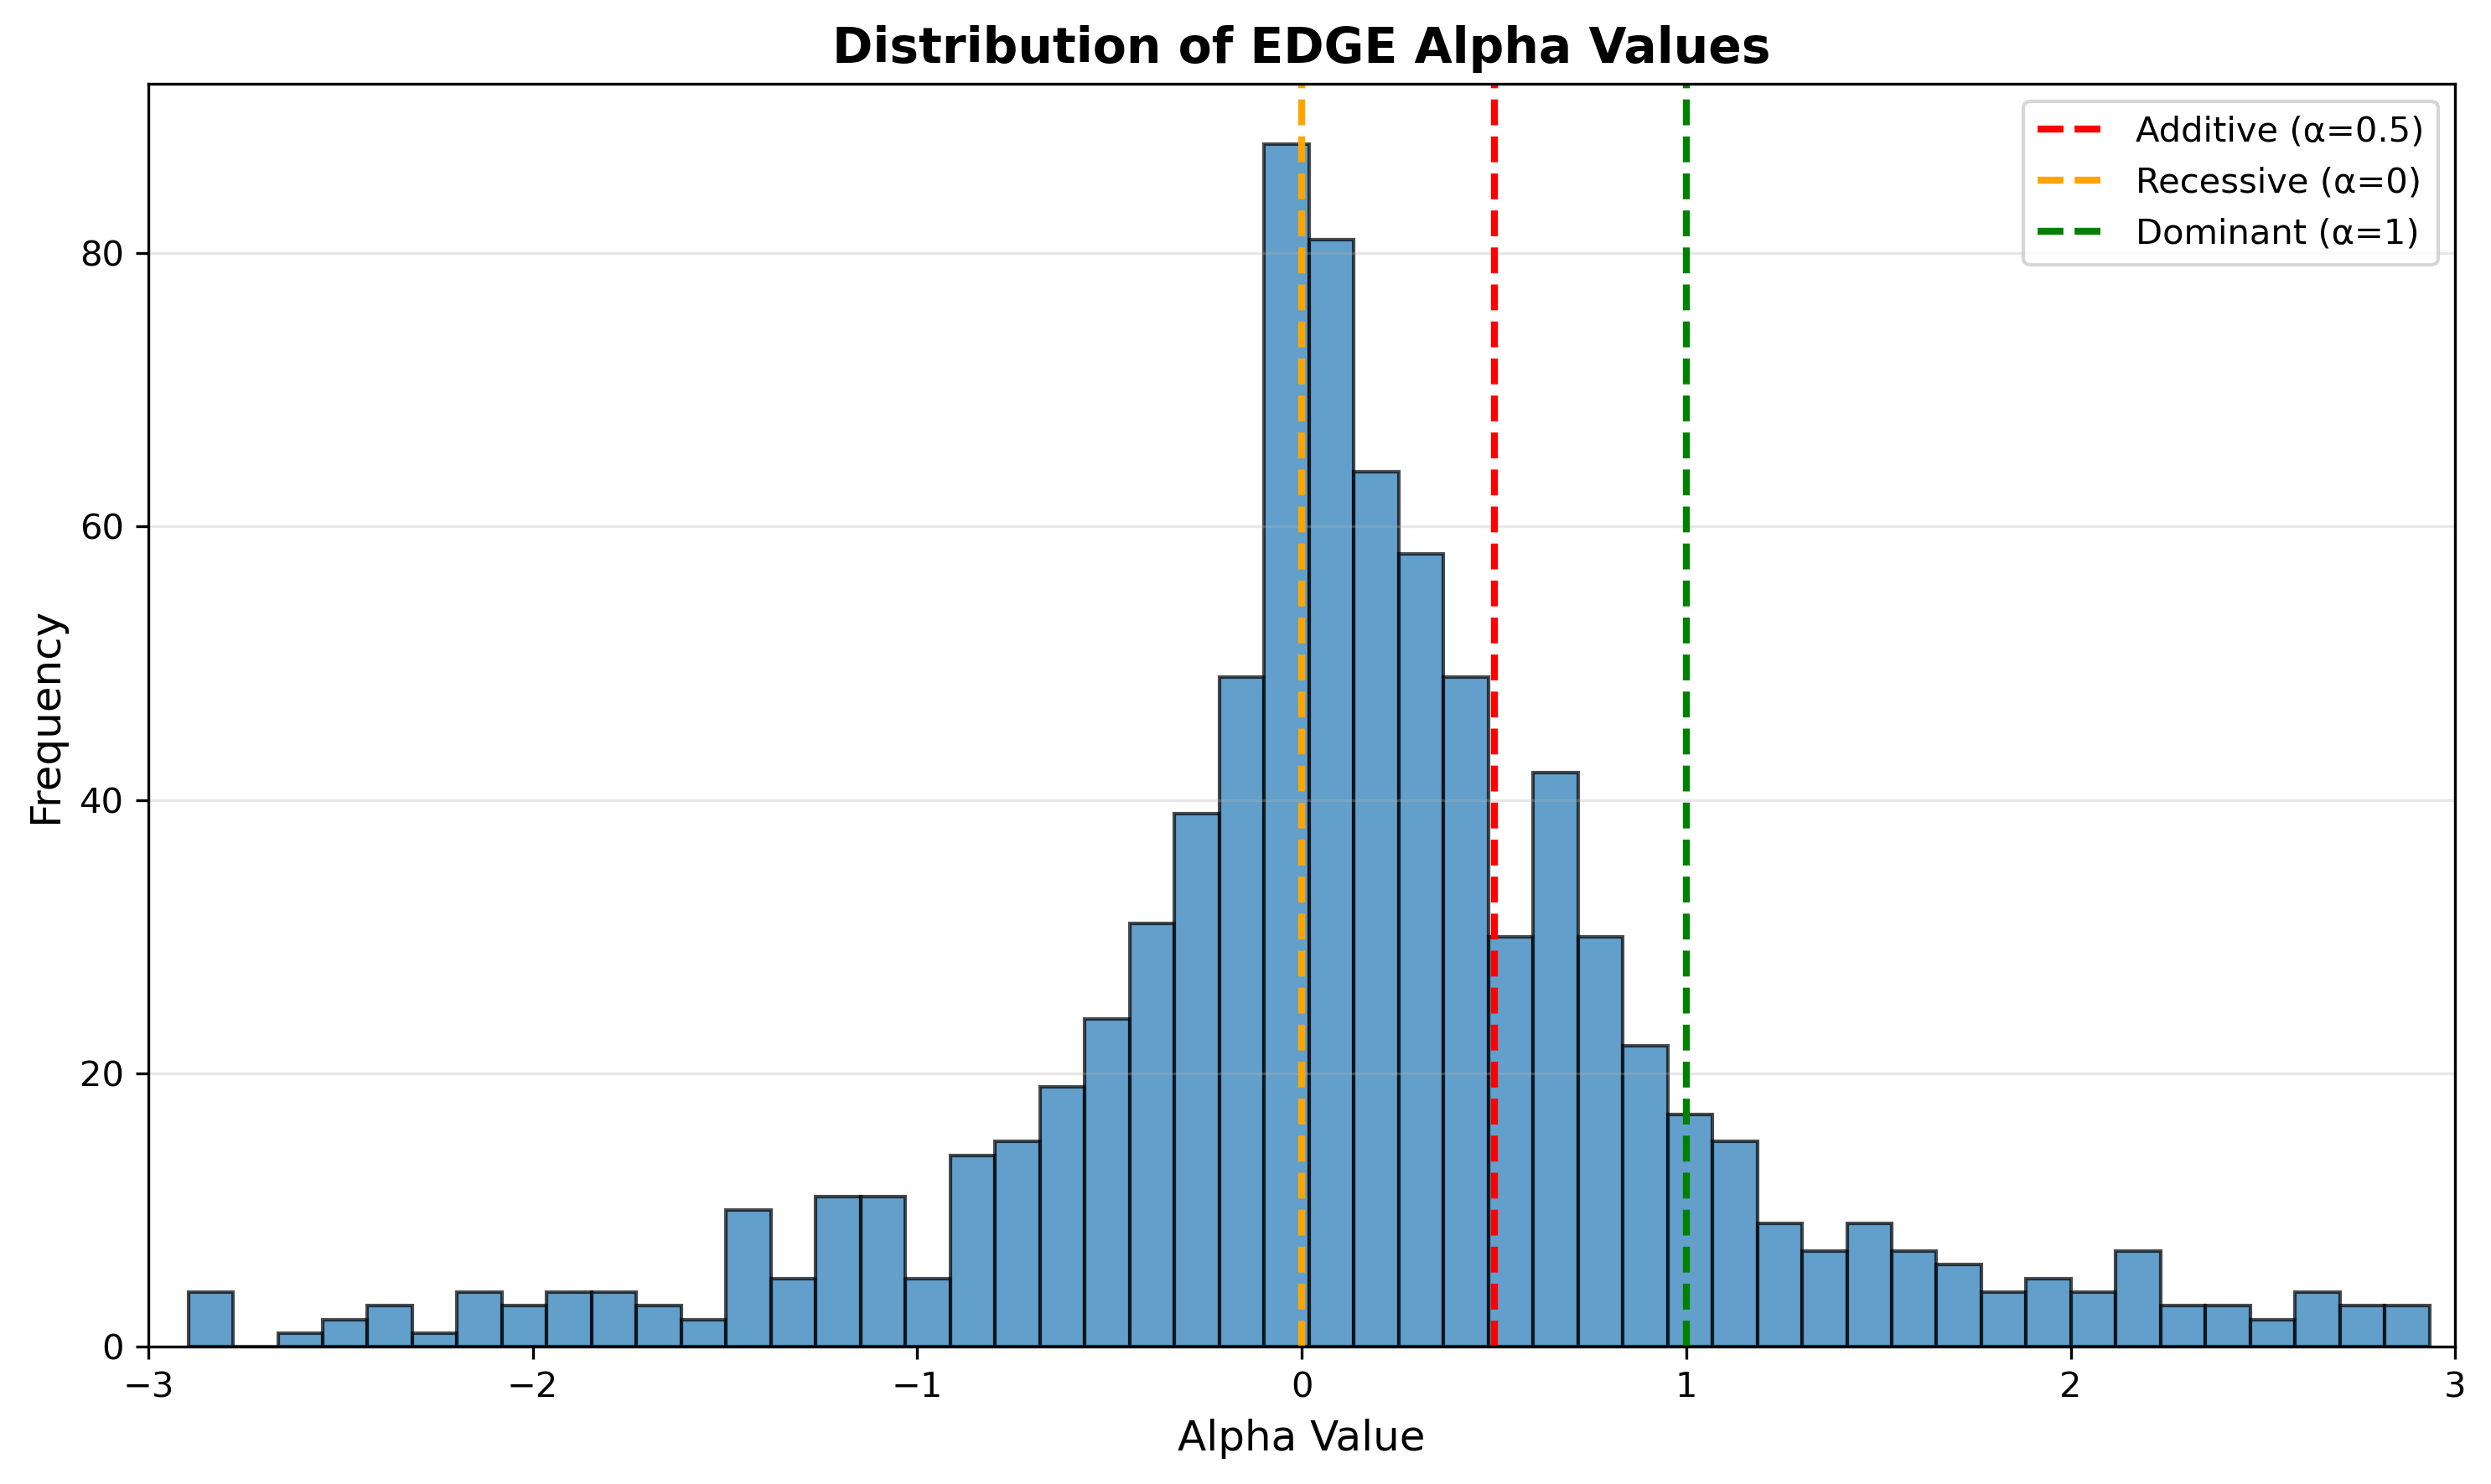

Manhattan plot saved to manhattan.png


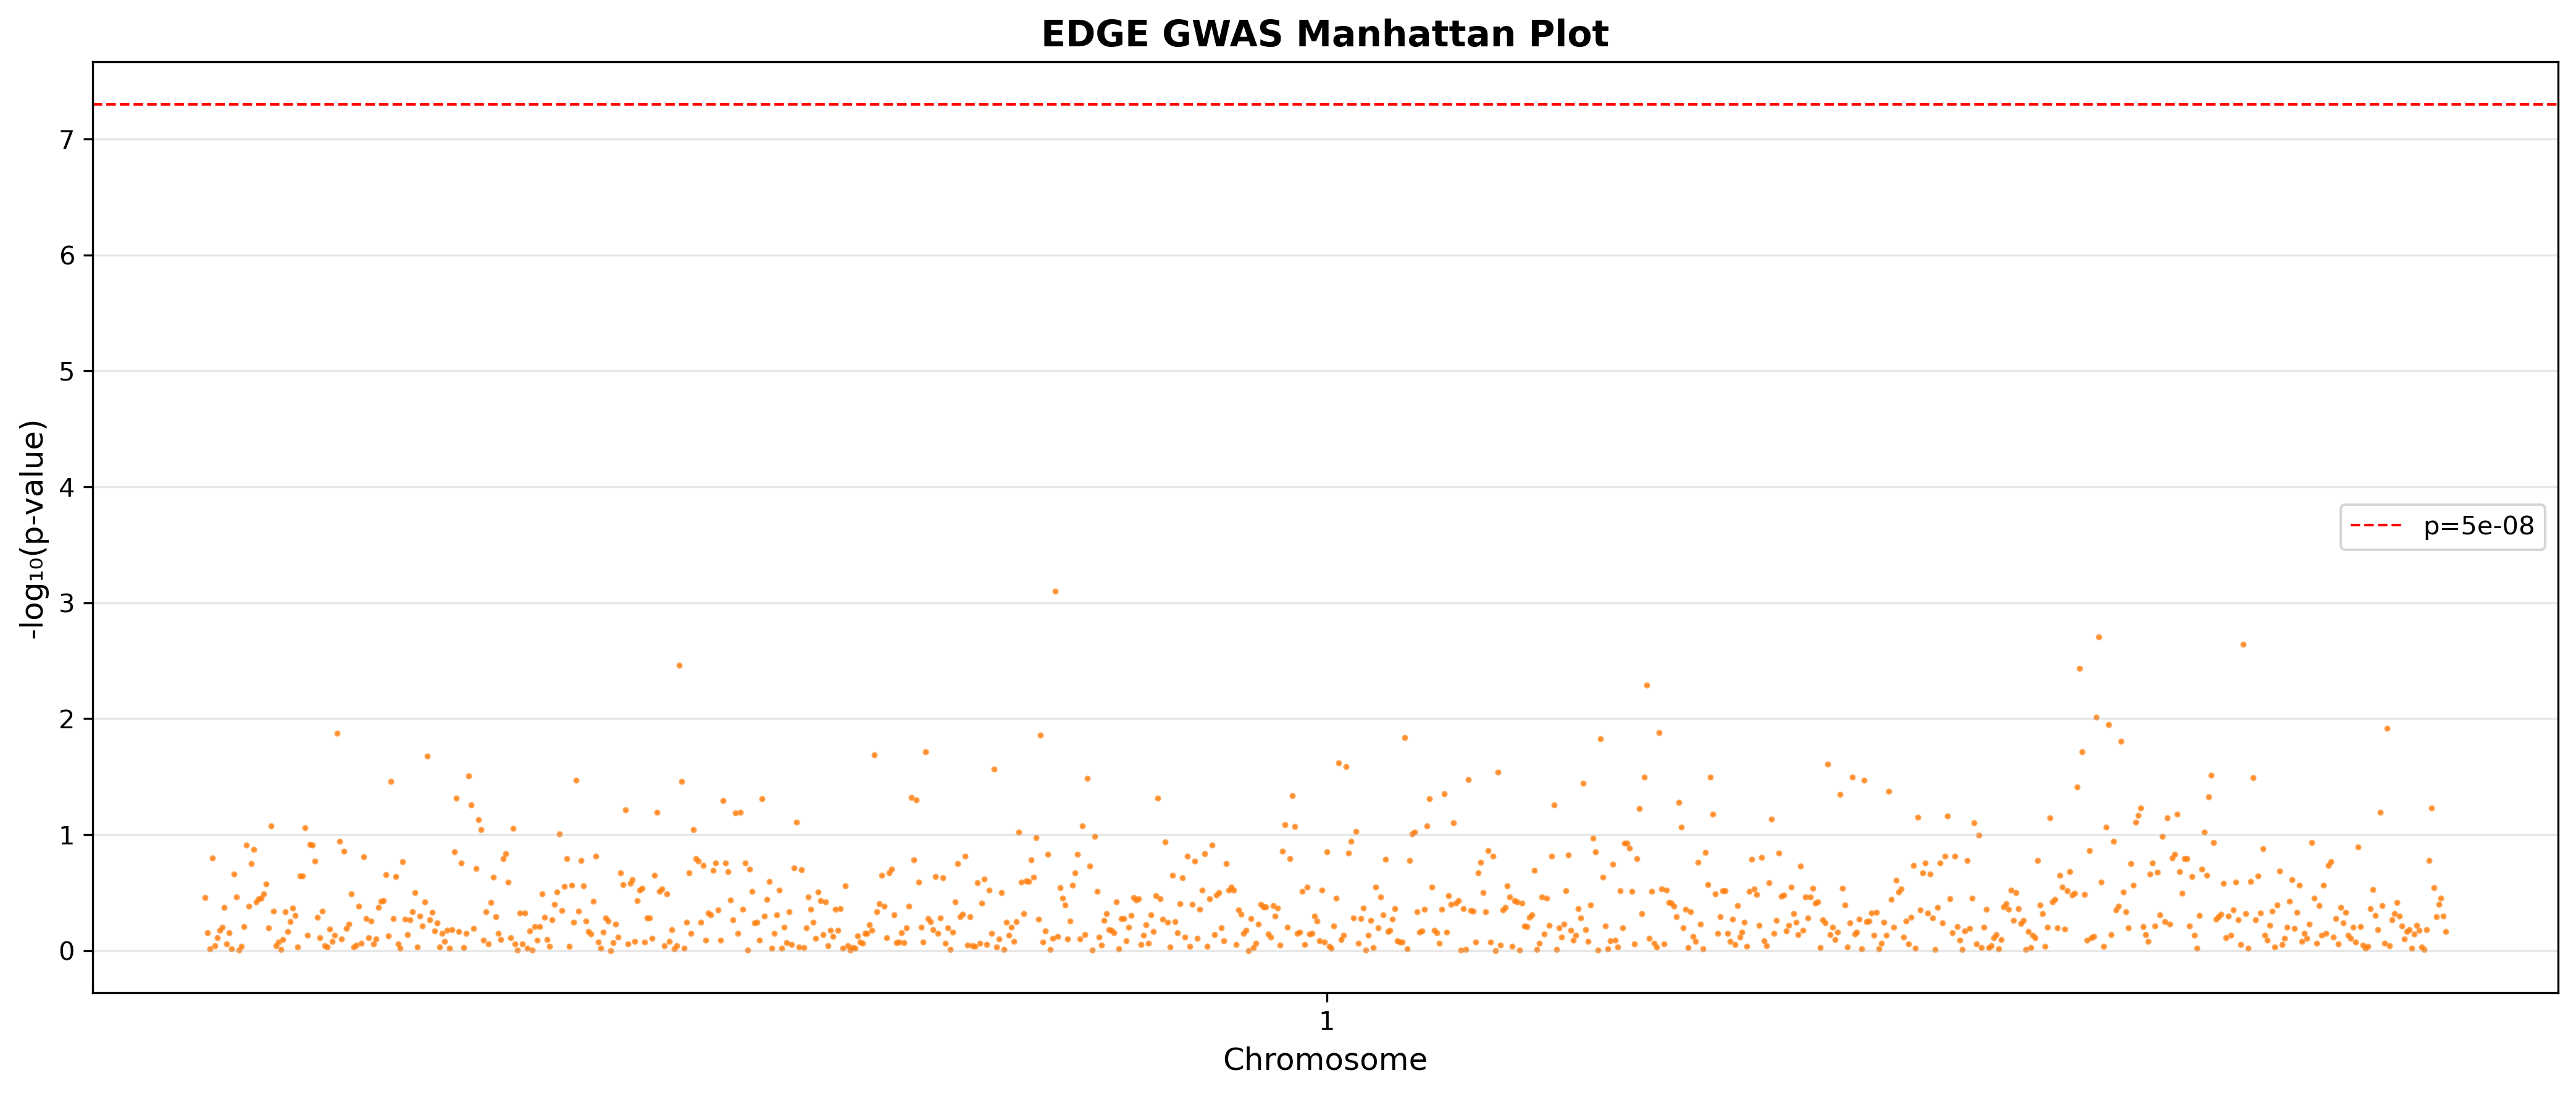

QQ plot saved to qq.png
Genomic inflation factor (λ): 0.999
Lambda GC: 0.999


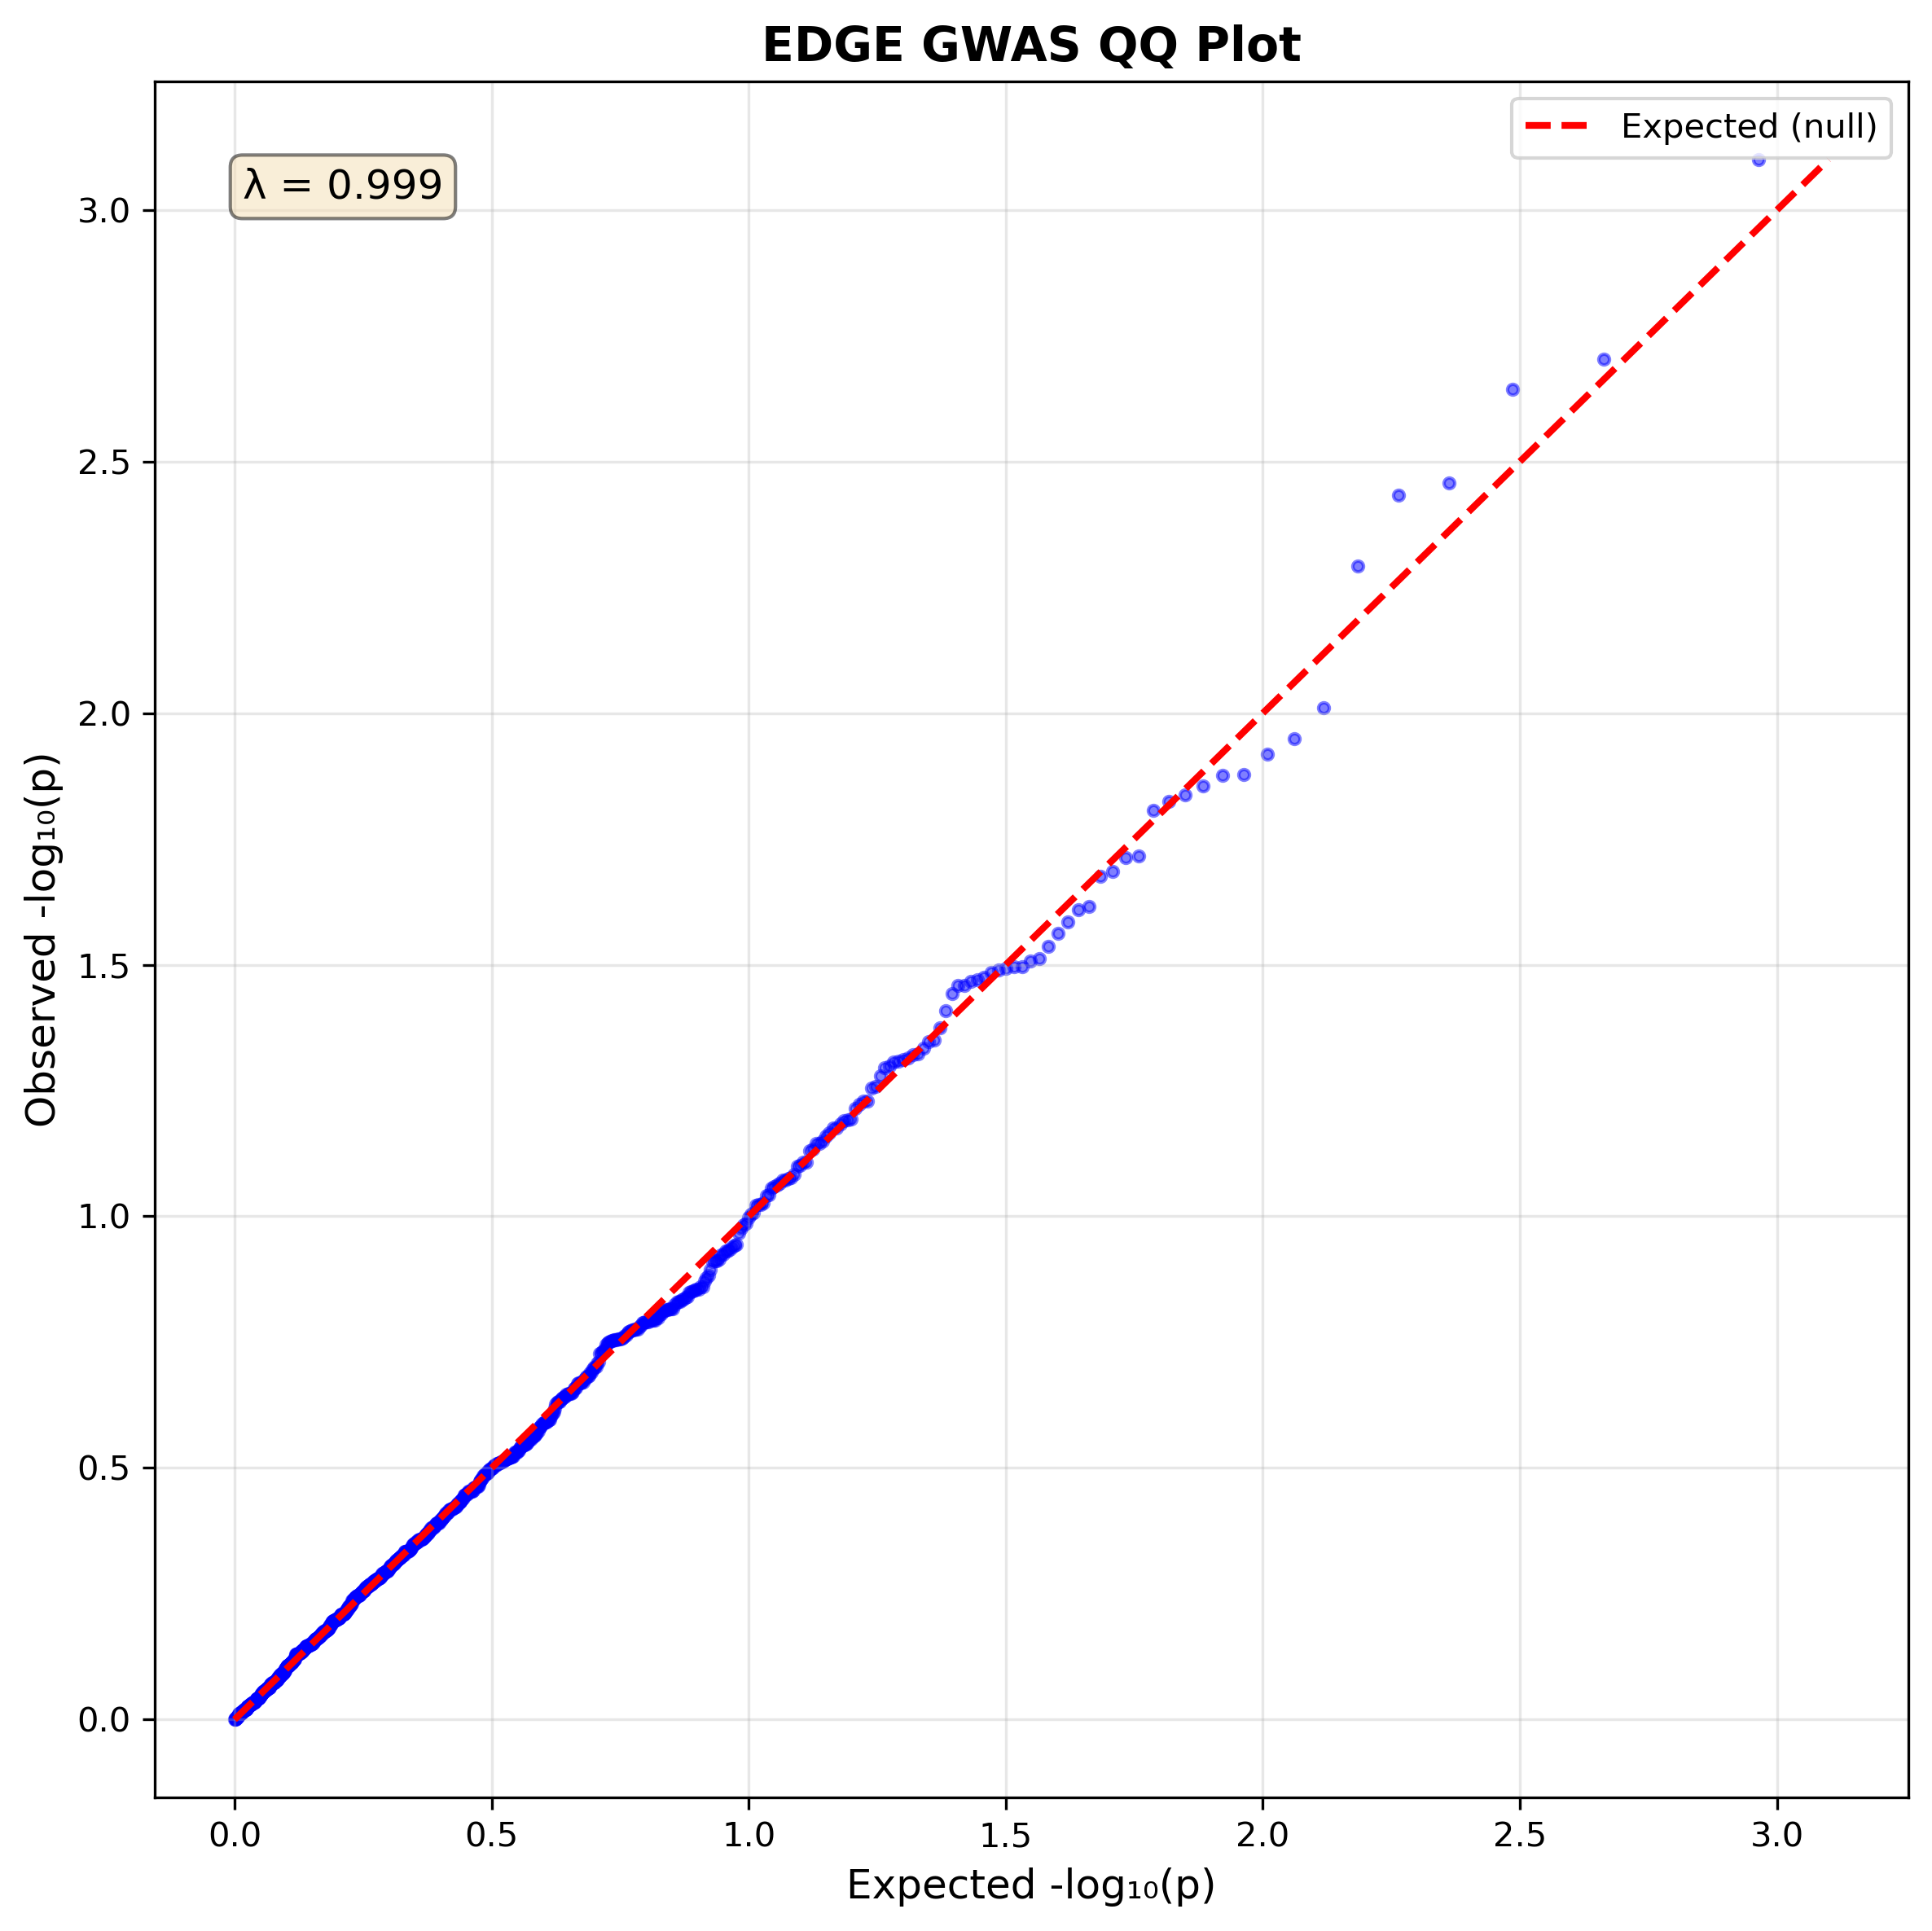

In [26]:
# Cell 15: Visualize with alpha distribution, gwas results in manhattan plot, and genetic inflation in qq plot
alpha_distribution = plot_alpha_distribution(alpha_df, 'alpha.png', xlim=(-3,3))
display(Image('alpha.png'))

manhattan_plot(gwas_df, 'manhattan.png')
display(Image('manhattan.png'))

lambda_gc = qq_plot(gwas_df, 'qq.png')
print(f"Lambda GC: {lambda_gc:.3f}")
display(Image('qq.png'))